Gift Wrapping implementado com listas

Esta implementação é uma alternativa para a implementação com a classe Ponto. Pode ser que facilite a implementação do restante do trabalho.


Cada ponto é um par de coordenadas [x, y], que é uma lista Python de tamanho 2. Exemplo de entrada:


pontos = [[2, 1], [15, 9], [4, 11], [3, 6], [12, 15], [8, 10]]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [13]:
def ancora(pontos):
    """Encontra o ponto de menor y em um conjunto de pontos.

    Entrada:
    pontos - lista de pontos representados por listas de tamanho 2
    Saida:
    i0 - indice do ponto de menor y
    """
    p0 = min(pontos, key = lambda x: x[1])
    i0 = pontos.index(p0)
    return i0

In [14]:
def orientacao(pi, pj , pk):
    """Encontra a orientacao dos segmentos de reta pi-pj-pk.
    
    Entrada:
    pi, pj, pk - pontos representados por listas de tamanho 2
    Retorna:
    0 - se os pontos sao colineares
    1 - se estao em orientacao horaria
    2 - se estao em orientacao anti horaria
    """
    valor = (float(pj[1] - pi[1]) * (pk[0] - pj[0])) - (float(pj[0] - pi[0]) * (pk[1] - pj[1]))
    if valor > 0:
        # Sentido horario
        return 1
    elif valor < 0:
        # Sentido anti horario
        return 2
    else:
        # Colinear
        return 0

In [15]:
def envoltoria_convexa(pontos):
    """Encontra a envoltoria convexa de um conjunto de pontos.
    
    Entrada:
    pontos - lista de pontos representados por listas de tamanho 2
    Saida:
    H - lista dos pontos da envoltoria convexa
    """

    S = pontos

    # Adicionar o ancora aa envoltoria
    i0 = ancora(S)
    H = [S[i0]]

    i = i0
    while True:
        # Procurar um ponto pk que esteja no sentido horario de todos os outros pontos
        k = (i + 1) % len(S) # k inicial eh o indice seguinte ao do ultimo ponto adicionado aa envoltoria

        # Para todos os pontos do conjunto de entrada
        for j in range(len(S)):
            # Se a orientacao pi-pk-pj eh no sentido horario, pj substitui pk como candidato aa envoltoria
            if orientacao(S[i], S[k], S[j]) == 1:
                k = j

        # k final eh o indice do ponto a ser incluido na envoltoria, que eh o ponto de referencia da proxima iteracao
        i = k

        # Interrompemos o algoritmo se chegamos ao primeiro ponto
        if i == i0: 
            break
        
        # Adicionamos o ponto candidato aa envoltoria
        H.append(S[i])
    
    return H

Testes:

In [16]:
'''Entrada'''

# S1 = [[2, 1], [15, 9], [4, 11], [3, 6], [12, 15], [8,10]]

rng = np.random.default_rng()
S1 = rng.random((10, 2))   # 10 random points in 2-D
S1 = np.floor(S1*10)

S = S1.tolist()

In [17]:
h = envoltoria_convexa(S)
h

[[3.0, 0.0],
 [7.0, 2.0],
 [8.0, 4.0],
 [9.0, 9.0],
 [3.0, 9.0],
 [0.0, 9.0],
 [0.0, 0.0]]

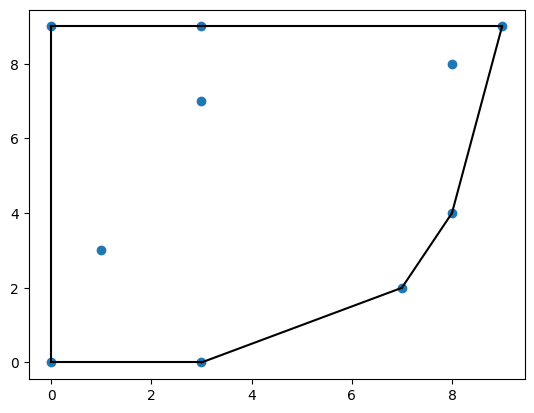

In [18]:
S2 = np.array(S1)
hull = ConvexHull(S2)


plt.plot(S2[:,0], S2[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(S2[simplex, 0], S2[simplex, 1], 'k-')